# ENTREGABLE 1

INSTRUCCIONES

Realizar la primera fase del análisis exploratorio (limpieza) usando el archivo CSV (dataset_banco.csv) con 45215 filas y 17 columnas.

#  1. El problema del negocio

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

# 2. El set de datos

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

#3. Una primera mirada al dataset

In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

data = pd.read_csv('dataset_banco.csv')

In [3]:
print(data.shape)
data.head()

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [4]:
# Veamos las variables categóricas y las numéricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


# 4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

## 4.1 Datos faltantes

Comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

El número total de registros debería ser 45.215. Sin embargo columnas como "job", "marital", "education", "balance", "duration" y "pdays".

Por ser tan pocos los datos  faltantes optaremos por eliminar las filas correspondientes:

In [5]:
nulos_por_columna = data.isnull().sum()
nulos_por_columna

age          0
job          2
marital      1
education    1
default      0
balance      2
housing      0
loan         0
contact      0
day          0
month        0
duration     1
campaign     0
pdays        1
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df = data.dropna()
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45210,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1.0,0,unknown,yes
45211,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0,unknown,yes
45212,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184.0,3,success,yes
45213,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0,unknown,no


## 4.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
- **Una columna categórica pero con un sólo nivel**. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
- **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "edad" todos los vlaores fuesen iguales a 50.
- **Columnas con información redundante**. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

In [7]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'Management', 'retired', 'admin.', 'services',
       'self-employed', 'MANAGEMENT', 'Self-employed', 'unemployed',
       'housemaid', 'student', 'Services', 'Retired', 'administrative'],
      dtype=object)

In [8]:
df['marital'].unique()

array(['married', 'single', 'div.', 'divorced', 'DIVORCED', 'Single'],
      dtype=object)

In [9]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary', 'SECONDARY',
       'Secondary', 'Primary', 'sec.', 'Tertiary', 'UNK'], dtype=object)

In [10]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [11]:
df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [12]:
df['loan'].unique()

array(['no', 'yes', 'No', 'YES', 'Yes', 'NO'], dtype=object)

In [13]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone', 'phone', 'mobile'],
      dtype=object)

In [14]:
df['month'].unique()

array(['may', 'nov', 'jun', 'jul', 'aug', 'oct', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [15]:
df['poutcome'].unique()

array(['unknown', 'UNK', 'failure', 'other', 'success', 'Success'],
      dtype=object)

Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:

In [16]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas.

## 4.3 Filas repetidas

In [17]:
hay_duplicados = df.duplicated()

print("Filas duplicadas:")
print(df[hay_duplicados])

Filas duplicadas:
       age          job   marital  education default  balance housing loan  \
1201    43  blue-collar   married  secondary     yes     -7.0      no   no   
36438   29   technician    single   tertiary      no  18254.0      no   no   
45197   59   management   married   tertiary      no    138.0     yes  yes   
45203   52   technician  divorced  secondary      no   1005.0     yes   no   

        contact  day month  duration  campaign  pdays  previous poutcome    y  
1201    unknown    8   may      70.0         1   -1.0         0  unknown   no  
36438  cellular   11   may     279.0         2   -1.0         0  unknown   no  
45197  cellular   16   nov     162.0         2  187.0         5  failure   no  
45203  cellular    2   jun     195.0         1   -1.0         0  unknown  yes  


In [18]:
df_sin_duplicados = df.drop_duplicates()
df_sin_duplicados

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45210,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1.0,0,unknown,yes
45211,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0,unknown,yes
45212,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184.0,3,success,yes
45213,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0,unknown,no


## 4.4 *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.


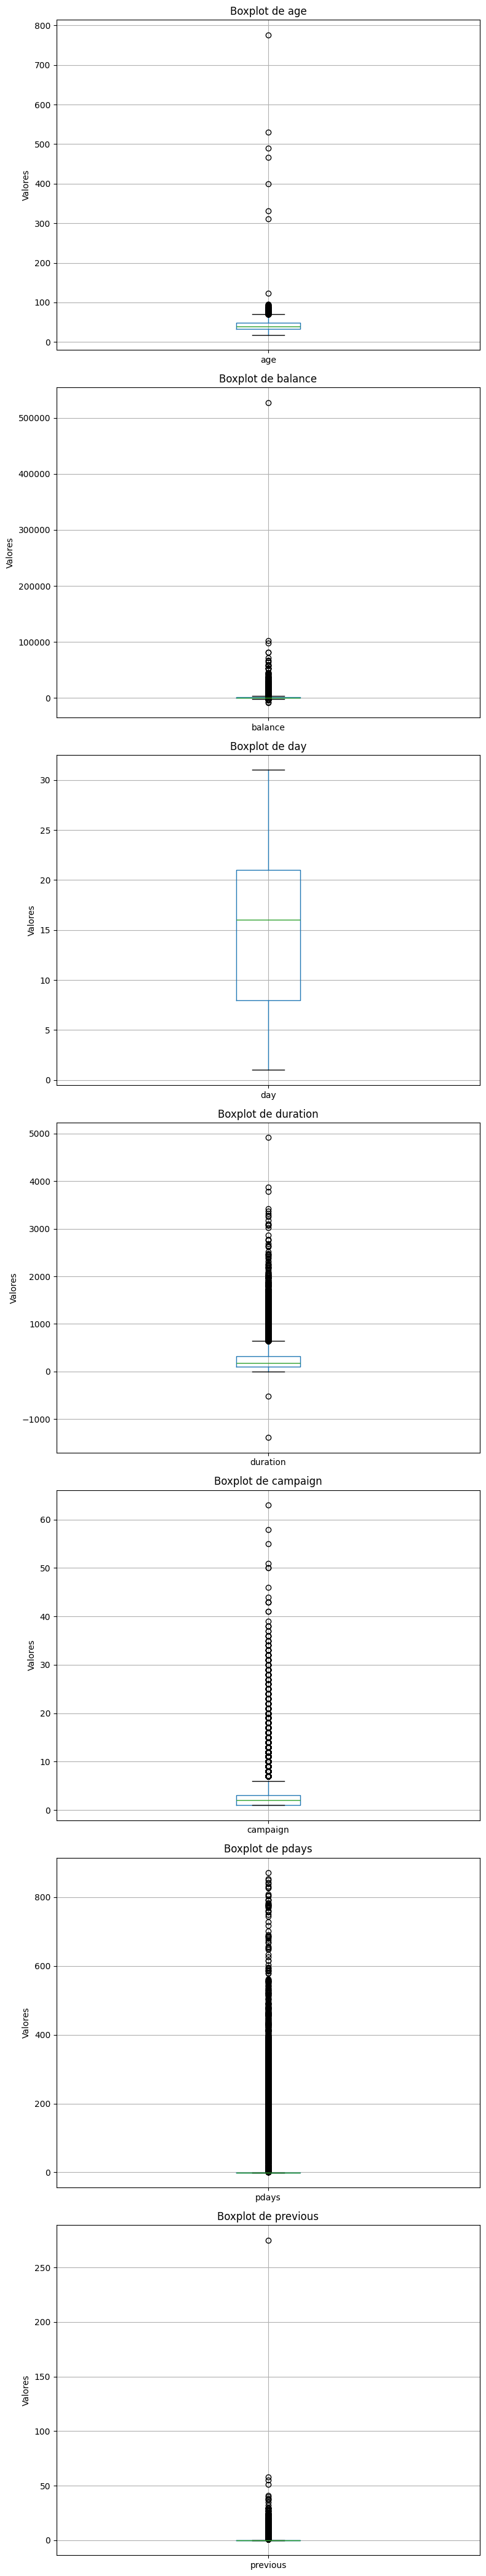

In [19]:
columnas_seleccionadas = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

num_columnas = len(columnas_seleccionadas)

# Crear subgráficos para cada columna seleccionada
fig, axes = plt.subplots(nrows=num_columnas, ncols=1, figsize=(8, 6*num_columnas))

# Iterar sobre las columnas seleccionadas y trazar un boxplot para cada una
for i, columna in enumerate(columnas_seleccionadas):
    df_sin_duplicados.boxplot(column=columna, ax=axes[i])  
    axes[i].set_title(f'Boxplot de {columna}')
    axes[i].set_ylabel('Valores')


plt.tight_layout()
plt.show()

In [20]:
df_sin_duplicados['previous'].min()

0

Observamos que la variable de edad presenta valores atípicos que carecen de sentido. Es altamente improbable que una persona tenga más de 100 años y es imposible que viva hasta los 300 años por este motivo han sido eliminados aquellas filas de miembros con edades superiores a 100 años

In [21]:
df_sin_duplicados.loc[df_sin_duplicados['age'] > 100, 'age'] = None

df2 = df_sin_duplicados.dropna(subset=['age'])
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45210,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1.0,0,unknown,yes
45211,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0,unknown,yes
45212,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184.0,3,success,yes
45213,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0,unknown,no


La variable 'duration', duración del último contacto, muestra valores negativos, lo cual es imposible ya que el tiempo no puede ser negativo. Por lo tanto, se infiere que estos valores deben ser eliminados.

In [22]:
df2.loc[df2['duration'] < 0, 'duration'] = None

df3 = df2.dropna(subset=['duration'])
df3

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45210,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1.0,0,unknown,yes
45211,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0,unknown,yes
45212,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184.0,3,success,yes
45213,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0,unknown,no


Que alguien haya sido llamado más de 250 veces previamente resulta poco común y podría considerarse un error, por lo que opto por eliminar esos registros.

In [23]:
df3.loc[df3['previous'] >250, 'previous'] = None

df4 = df3.dropna(subset=['previous'])
df4

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0.0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0.0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45210,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1.0,0.0,unknown,yes
45211,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0.0,unknown,yes
45212,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184.0,3.0,success,yes
45213,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0.0,unknown,no


In [24]:
df4['campaign'].max()

63

In [25]:
df4.loc[df4['previous'] > 63, 'previous'] = None

df5 = df4.dropna(subset=['previous'])
df5

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0.0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0.0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45210,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1.0,0.0,unknown,yes
45211,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0.0,unknown,yes
45212,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184.0,3.0,success,yes
45213,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0.0,unknown,no


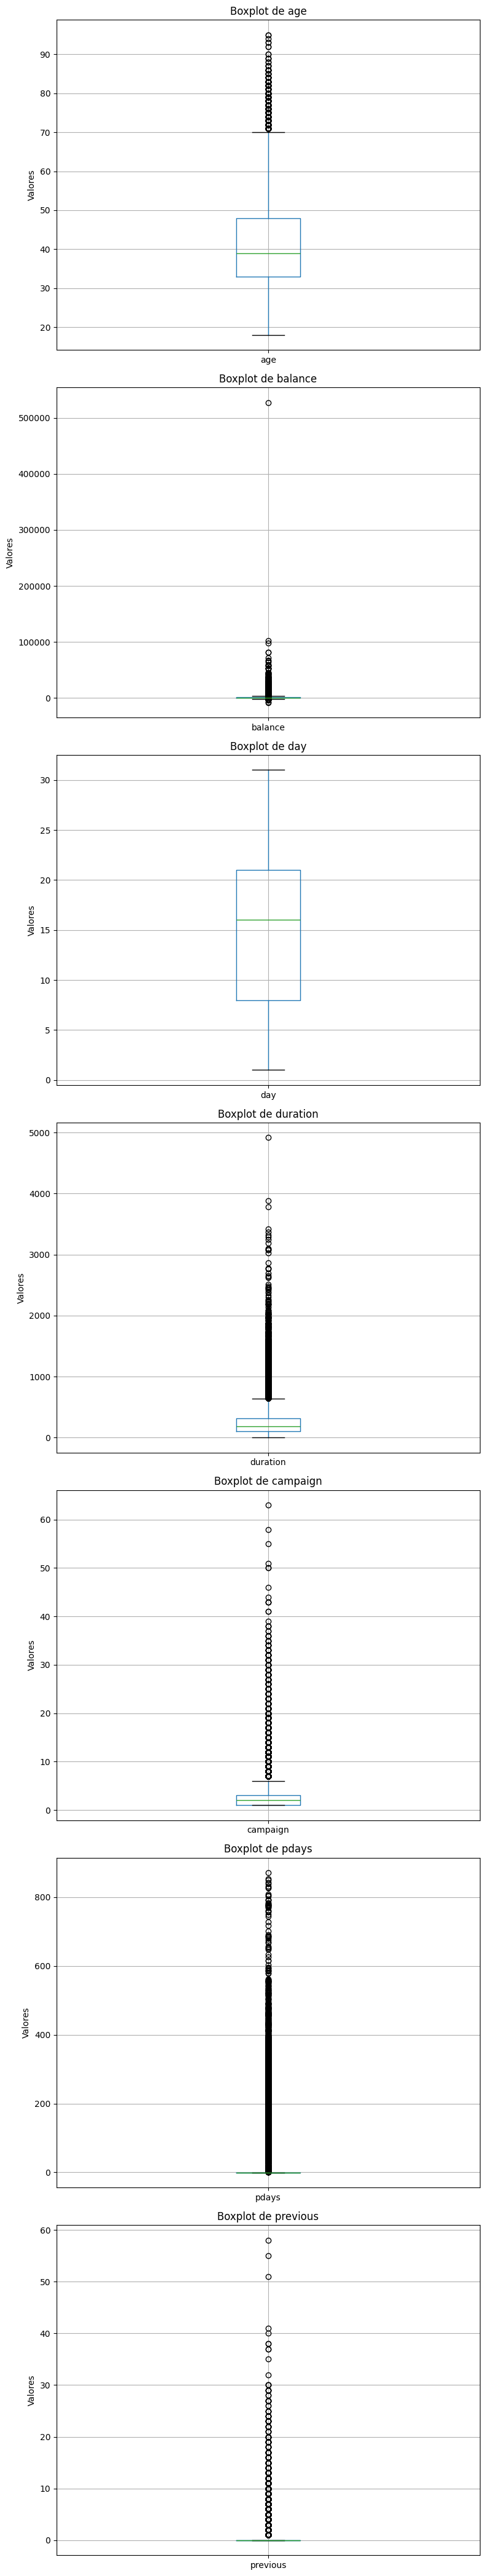

In [26]:
columnas_seleccionadas = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

num_columnas = len(columnas_seleccionadas)

# Crear subgráficos para cada columna seleccionada
fig, axes = plt.subplots(nrows=num_columnas, ncols=1, figsize=(8, 6*num_columnas))

# Iterar sobre las columnas seleccionadas y trazar un boxplot para cada una
for i, columna in enumerate(columnas_seleccionadas):
    df5.boxplot(column=columna, ax=axes[i])  
    axes[i].set_title(f'Boxplot de {columna}')
    axes[i].set_ylabel('Valores')

plt.tight_layout()
plt.show()

## 4.5 Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles

En la sección 4.2, hemos examinado los valores presentes en cada columna y hemos observado que existen errores tipográficos en las variables categóricas. Por lo tanto, procederé a corregirlos.

In [27]:
df5['job'] = df5['job'].replace({'Management': 'management', 'MANAGEMENT': 'management','Self-employed': 'self-employed','administrative':'admin.','Services':'services','Retired':'retired'})
df5['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [28]:
df5['marital'] = df5['marital'].replace({'div.': 'divorced', 'DIVORCED': 'divorced','Single':'single'})
df5['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [29]:
df5['education'] = df5['education'].replace({'Primary': 'primary', 'SECONDARY': 'secondary','sec.':'secondary','Secondary':'secondary','UNK':'unknown','Tertiary':'tertiary'})
df5['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [30]:
df5['loan'] = df5['loan'].replace({'NO': 'no', 'No': 'no','YES':'yes','Yes':'yes'})
df5['loan'].unique()

array(['no', 'yes'], dtype=object)

In [31]:
df5['contact'] = df5['contact'].replace({'mobile': 'cellular', 'phone': 'telephone'})
df5['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [32]:
df5['poutcome'] = df5['poutcome'].replace({'UNK': 'unknown', 'Success': 'success'})
df5['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

## Conclusiones

A modo de resumen es interesante resaltar los siguientes puntos:

 - Es fundamental evaluar si los valores atípicos presentes en las variables del problema tienen sentido dentro del contexto del problema en cuestión. Comprender la naturaleza del problema nos permite determinar si estos valores son errores que requieren corrección.
  
 - Los errores tipográficos son comunes y pueden introducir confusiones en el modelo. Por lo tanto, es esencial identificar y corregir estos errores durante la fase de preparación de datos para garantizar la calidad y la integridad de los datos.
 
 - La visualización de datos, como mediante el uso de diagramas de cajas, ofrece una perspectiva más profunda de las variables y permite comprender mejor la distribución y la variabilidad de los datos. Esta práctica permite comprender el comportamiento de las variables en el conjunto de datos.
  

Concluyendo, realizar un análisis exploratorio de datos es una fase crítica en cualquier proyecto de ciencia de datos. Proporciona información valiosa sobre la naturaleza de los datos, identifica posibles problemas y orienta el desarrollo de modelos más precisos y efectivos. 

In [33]:
df5.to_csv('dataset.csv', index=False)